## Challenge 1.4

In Task 1.1, we assumed that the parameter $\epsilon_d$ in $\hat{H}_d$ is constant throughout the time evolution. Now, you will simulate what happens if we let $\epsilon_d$ depend on time.

We would like to answer the question: What is the optimal function of time of $\epsilon_d(t)$ to inflate a cat from the vacuum to a target value of $\alpha^2 = 4$ in a given time $T =3$?

## A general roadmap
1) The challenge tells us to vary the value of Ed based on t because we need to find the optimial function of ed(t) 

2) To inflate a cat from the vacuum to a target value of α2 = 4 in a given time T = 3

3) To get an optimized value we need to first fix our target value which is the task from 1.1 as mentioned in the task so this is like the reference value we use in our loss function which is then directed to . First we needed to figure out how to vary ed as a function of time and also we wanted to make the Hamiltonian piecewise which could be done by the dq.pwc function. This essentially adds like the bins to our problem which we actually have to play around with in this problem. So the idea was this.

We got the target rho values from the 1st task 1.1 hamiltonian and then we do a time evolution of the hamiltonians bsed on the values thats because H depends on ed. Based on these different ed values. In this case we started with different bins. We started with 30 as the base value. so we in general obtained 30 rho values from the rho hamiltonian. Since we are only interested in the last hamiltonian which is the one that has completed the time evolution which is the 30th step. We used the dq.fidelity function which is like calculating the similarity between the two rho values, essentially we modelled it as our loss function. Based on this we get 30 values and plot it. After plotting it up we use gradient descent to find out the minima value because sometimes the function gets stuck in local minima so taking a gradient descent made total sense so that we can get to the perfect global minima value. We get 30 optimal parameters from 30 graphs which is essentially e optimal for that particular graph later we just used them to get a final plot for e vs t which signified the perfect optimal e vs t plot. Further we played around with the bin values and T values and we compared all of them in a plot to summarize our findings on 3 types of bin values.


### Referring back to the challenge 1.1 mesolver that gives us the resultant `rho` values for the given Hamiltonian where the Hamiltonian of the system was given by:

$$\begin{aligned}
\hat{H} &= \hat{H}_{\mathrm{2ph}} + \hat{H}_d,\qquad \mathrm{with}\\
\hat{H}_{\mathrm{2ph}} &= g_2 {{}\hat{a}^\dagger}^2 \hat{b} + g_2^* \hat{a}^2 \hat{b}^\dagger,\\
\hat{H}_d &= \epsilon_d^* \hat{b} + \epsilon_d \hat{b}^\dagger.
\end{aligned}$$


|███████▎  |  73.4% ◆ elapsed 736.25ms ◆ remaining 278.20ms
|██████████| 100.0% ◆ elapsed 1.11s ◆ remaining 0.00ms     

100%|██████████| 50/50 [00:05<00:00,  9.24it/s]


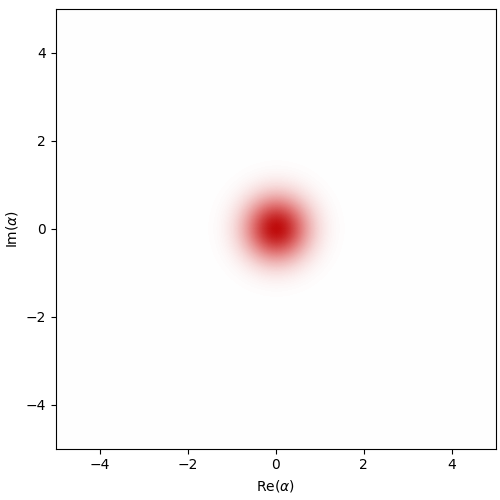

In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import matplotlib.pyplot as plt

#Define parameters
g_z = 1.0
e_d = -4
kappa_b = 10

#Define Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))

#Define initial state
psi0 = dq.coherent((n_a, n_b), [0, 0])

#Define Hamiltonian
H = g_z * (a.dag() @ a.dag() @ b + a @ a @ b.dag()) + e_d * (b + b.dag())


#Define dissipators
L = [jnp.sqrt(kappa_b) * b]

#Time evolution parameters
ts = jnp.linspace(0, 3, 100)

#Solve Master Equation
res = dq.mesolve(H, L, psi0, ts)
rho = dq.ptrace(res.states, 0)
#Plot Wigner function animation
dq.plot.wigner_gif(rho)

### Here we get the target rho values and these are like the target rho values we have to compare against to find the optimal ed(t) values

In [2]:
rho

QArray: shape=(100, 20, 20), dims=(20,), dtype=complex64, layout=dense
[[[ 1.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
  [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
  [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
  ...
  [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
  [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
  [ 0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]]

 [[ 9.99994099e-01+0.j  0.00000000e+00+0.j  2.47058296e-03+0.j ...
    0.00000000e+00+0.j  0.00000000e+00+0.j  0.00000000e+00+0.j]
  [ 

#### Now to actually make the hamiltonian evolve with time is like saying making edt evolve with time so we can do it by using the `dq.pwc` function which puts in different values of ed as a function of time and get different time evolved hamiltonian values. 

In [3]:
times = [0.0, 15.0, 30.0]
values = [-4.0, 4.0]
H_bar = dq.pwc(times, values, H)

In [6]:
print(H_bar)

PWCTimeQArray: shape=(100, 100), dims=(20, 5), dtype=complex64, layout=dia, ndiags=4


In [7]:
H_30 = []
for i in range(0,30):
    H_30.append(H_bar(i))
print(H_30)

[QArray: shape=(100, 100), dims=(20, 5), dtype=complex64, layout=dia, ndiags=4
[[      ⋅       16.      +0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]
 [16.      +0.j       ⋅       22.627417+0.j ...       ⋅      
        ⋅             ⋅      ]
 [      ⋅       22.627417+0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]
 ...
 [      ⋅             ⋅             ⋅       ...       ⋅      
  27.712812+0.j       ⋅      ]
 [      ⋅             ⋅             ⋅       ... 27.712812+0.j
        ⋅       32.      +0.j]
 [      ⋅             ⋅             ⋅       ...       ⋅      
  32.      +0.j       ⋅      ]], QArray: shape=(100, 100), dims=(20, 5), dtype=complex64, layout=dia, ndiags=4
[[      ⋅       16.      +0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]
 [16.      +0.j       ⋅       22.627417+0.j ...       ⋅      
        ⋅             ⋅      ]
 [      ⋅       22.627417+0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]

In [8]:
# Define parameters
kappa_b = 10

# Define Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))

# Define initial state
psi0 = dq.coherent((n_a, n_b), [0, 0])

# Define dissipators
L = [jnp.sqrt(kappa_b) * b]

# Time evolution parameters
ts = jnp.linspace(0, 3, 100)

rho_30 = [] # Initialize an empty rho matrix with 30 rho values that we get for each matrix
# Loop over the precomputed Hamiltonians in final_H
for i in range(0,30):
    print(f"Running simulation {i}/30")

    # Solve Master Equation
    res = dq.mesolve(H_30[i], L, psi0, ts)
    rho1 = dq.ptrace(res.states, 0)
    rho_30.append(rho1)

print("All simulations completed.")

Running simulation 0/30


|█         |  11.0% ◆ elapsed 127.29ms ◆ remaining 1.02s

Running simulation 1/30


|██████████| 100.0% ◆ elapsed 1.55s ◆ remaining 0.00ms     


Running simulation 2/30


|██████████| 100.0% ◆ elapsed 1.59s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 138.62ms ◆ remaining 1.12s

Running simulation 3/30


|██████████| 100.0% ◆ elapsed 1.60s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 144.30ms ◆ remaining 1.16s

Running simulation 4/30


|██████████| 100.0% ◆ elapsed 1.55s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 158.66ms ◆ remaining 1.28s

Running simulation 5/30


|██████████| 100.0% ◆ elapsed 1.62s ◆ remaining 0.00ms     
|█▌        |  15.3% ◆ elapsed 184.08ms ◆ remaining 971.75ms

Running simulation 6/30


|██████████| 100.0% ◆ elapsed 1.53s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 155.61ms ◆ remaining 1.25s

Running simulation 7/30


|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms     
|█▌        |  15.3% ◆ elapsed 186.34ms ◆ remaining 980.54ms

Running simulation 8/30


|██████████| 100.0% ◆ elapsed 1.58s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 146.89ms ◆ remaining 1.18s

Running simulation 9/30


|██████████| 100.0% ◆ elapsed 1.97s ◆ remaining 0.00ms     


Running simulation 10/30


|██████████| 100.0% ◆ elapsed 2.27s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 107.56ms ◆ remaining 1.45s

Running simulation 11/30


|██████████| 100.0% ◆ elapsed 2.13s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 139.74ms ◆ remaining 1.42s

Running simulation 12/30


|██████████| 100.0% ◆ elapsed 2.18s ◆ remaining 0.00ms  
|█         |  11.0% ◆ elapsed 187.05ms ◆ remaining 1.51s

Running simulation 13/30


|██████████| 100.0% ◆ elapsed 2.18s ◆ remaining 0.00ms  
|█         |  11.0% ◆ elapsed 200.34ms ◆ remaining 1.36s

Running simulation 14/30


|██████████| 100.0% ◆ elapsed 2.37s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 111.82ms ◆ remaining 1.51s

Running simulation 15/30


|██████████| 100.0% ◆ elapsed 2.39s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 107.63ms ◆ remaining 1.45s

Running simulation 16/30


|██████████| 100.0% ◆ elapsed 2.41s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 107.63ms ◆ remaining 1.45s

Running simulation 17/30


|██████████| 100.0% ◆ elapsed 2.40s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 160.06ms ◆ remaining 2.17s

Running simulation 18/30


|██████████| 100.0% ◆ elapsed 2.47s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 115.34ms ◆ remaining 1.56s

Running simulation 19/30


|██████████| 100.0% ◆ elapsed 2.48s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 105.58ms ◆ remaining 1.43s

Running simulation 20/30


|██████████| 100.0% ◆ elapsed 2.40s ◆ remaining 0.00ms  
|█         |  11.0% ◆ elapsed 199.07ms ◆ remaining 1.61s

Running simulation 21/30


|██████████| 100.0% ◆ elapsed 2.30s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 109.55ms ◆ remaining 1.48s

Running simulation 22/30


|██████████| 100.0% ◆ elapsed 2.40s ◆ remaining 0.00ms  


Running simulation 23/30


|██████████| 100.0% ◆ elapsed 2.49s ◆ remaining 0.00ms  


Running simulation 24/30


|██████████| 100.0% ◆ elapsed 2.41s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 110.52ms ◆ remaining 1.49s

Running simulation 25/30


|██████████| 100.0% ◆ elapsed 2.44s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 161.45ms ◆ remaining 2.19s

Running simulation 26/30


|██████████| 100.0% ◆ elapsed 2.46s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 111.88ms ◆ remaining 1.51s

Running simulation 27/30


|██████████| 100.0% ◆ elapsed 2.40s ◆ remaining 0.00ms  


Running simulation 28/30

|▋         |   6.8% ◆ elapsed 116.67ms ◆ remaining 1.58s

|██████████| 100.0% ◆ elapsed 2.47s ◆ remaining 0.00ms  


Running simulation 29/30

|▋         |   6.8% ◆ elapsed 102.11ms ◆ remaining 1.38s

|██████████| 100.0% ◆ elapsed 2.49s ◆ remaining 0.00ms  
|          |   0.0% ◆ elapsed 0.00ms ◆ remaining ?

All simulations completed.


|██████████| 100.0% ◆ elapsed 2.34s ◆ remaining 0.00ms  


### Storing all the 30 hamiltonian time-evolved matrices i.e. the rho values 

In [22]:
confidence_arrays_30 = []
for i in range(0,30):
    fidelity = dq.fidelity(rho, rho_30[i])
    confidence_arrays_30.append(1 - fidelity)

In [23]:
print(confidence_arrays_30[29])

[0.         0.0013572  0.01920772 0.08132297 0.19953847 0.35256952
 0.50393474 0.6280728  0.7152568  0.7656116  0.7831658  0.7732467
 0.7434346  0.70518994 0.66995335 0.6447134  0.6314842  0.62936527
 0.63653636 0.6492497  0.6613501  0.6662148  0.6580092  0.6346437
 0.59870553 0.5561184  0.51305294 0.4746933  0.4434085  0.42006326
 0.40401167 0.39332098 0.38494837 0.37698138 0.36687028 0.35315615
 0.33595383 0.3167215  0.29705262 0.27831692 0.26157606 0.24719232
 0.23529881 0.22519743 0.21660143 0.2089569  0.20147222 0.19384915
 0.18551898 0.17753404 0.16919965 0.16099846 0.15281838 0.14588112
 0.13899338 0.13238913 0.12721527 0.12169504 0.11644763 0.11178398
 0.10755116 0.10298276 0.0986411  0.09374464 0.09000331 0.08588374
 0.08176851 0.07846755 0.07476306 0.07217544 0.0689218  0.06577271
 0.0627048  0.06035405 0.05759078 0.05494553 0.05297798 0.05040133
 0.0479576  0.04555345 0.04375768 0.04207355 0.03998333 0.03836298
 0.03680897 0.03475499 0.0337128  0.03165305 0.03076905 0.029052

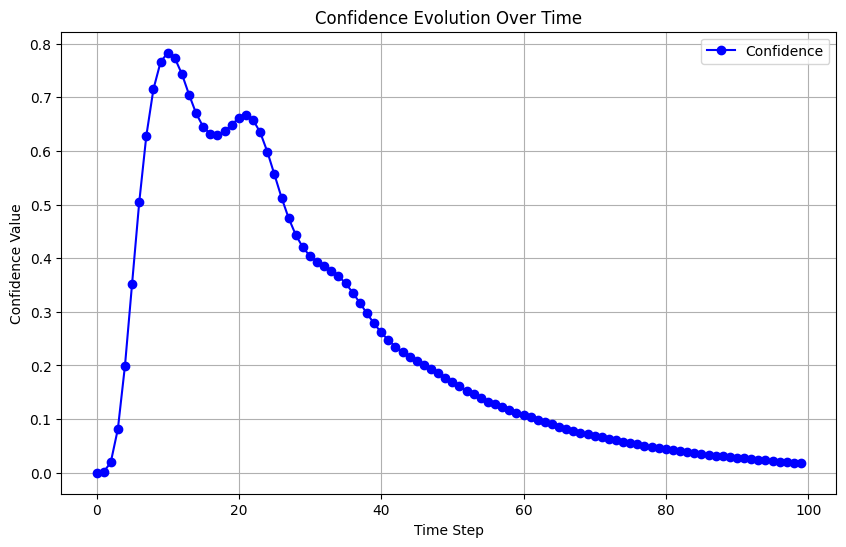

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Sample confidence array (assuming it's a NumPy array)
confidence_array = confidence_arrays_30
    
# Time steps (assuming sequential indexing)
time_steps = np.arange(len(confidence_array))
    
# Plot the confidence values over time
plt.figure(figsize=(10, 6))
plt.plot(time_steps, confidence_array, marker='o', linestyle='-', color='b', label="Confidence")
plt.xlabel("Time Step")
plt.ylabel("Confidence Value")
plt.title("Confidence Evolution Over Time")
plt.legend()
plt.grid()
plt.show()

In [26]:
times = [0.0, 30.0, 60.0]
values = [-4.0, 4.0]
H_bar = dq.pwc(times, values, H)

In [27]:
H_60 = []
for i in range(0,60):
    H_60.append(H_bar(i))
print(H_60)

[QArray: shape=(100, 100), dims=(20, 5), dtype=complex64, layout=dia, ndiags=4
[[      ⋅       16.      +0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]
 [16.      +0.j       ⋅       22.627417+0.j ...       ⋅      
        ⋅             ⋅      ]
 [      ⋅       22.627417+0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]
 ...
 [      ⋅             ⋅             ⋅       ...       ⋅      
  27.712812+0.j       ⋅      ]
 [      ⋅             ⋅             ⋅       ... 27.712812+0.j
        ⋅       32.      +0.j]
 [      ⋅             ⋅             ⋅       ...       ⋅      
  32.      +0.j       ⋅      ]], QArray: shape=(100, 100), dims=(20, 5), dtype=complex64, layout=dia, ndiags=4
[[      ⋅       16.      +0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]
 [16.      +0.j       ⋅       22.627417+0.j ...       ⋅      
        ⋅             ⋅      ]
 [      ⋅       22.627417+0.j       ⋅       ...       ⋅      
        ⋅             ⋅      ]

In [31]:
# Define parameters
kappa_b = 10

# Define Hilbert space truncation
n_a = 20  # Memory mode
n_b = 5   # Buffer mode

a = dq.tensor(dq.destroy(n_a), dq.eye(n_b))
b = dq.tensor(dq.eye(n_a), dq.destroy(n_b))

# Define initial state
psi0 = dq.coherent((n_a, n_b), [0, 0])

# Define dissipators
L = [jnp.sqrt(kappa_b) * b]

# Time evolution parameters
ts = jnp.linspace(0, 3, 100)

rho_60 = [] # Initialize an empty rho matrix with 60 rho values that we get for each matrix
# Loop over the precomputed Hamiltonians in final_H
for i in range(0,60):
    print(f"Running simulation {i}/60")

    # Solve Master Equation
    res = dq.mesolve(H_60[i], L, psi0, ts)
    rho1 = dq.ptrace(res.states, 0)
    rho_60.append(rho1)

print("All simulations completed.")

Running simulation 0/30
Running simulation 1/30


|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms     


Running simulation 2/30


|██████████| 100.0% ◆ elapsed 1.69s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 155.07ms ◆ remaining 1.25s

Running simulation 3/30


|██████████| 100.0% ◆ elapsed 1.69s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 184.43ms ◆ remaining 1.40s

Running simulation 4/30


|██████████| 100.0% ◆ elapsed 1.72s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 158.69ms ◆ remaining 1.28s

Running simulation 5/30


|██████████| 100.0% ◆ elapsed 1.70s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 135.71ms ◆ remaining 1.09s

Running simulation 6/30


|██████████| 100.0% ◆ elapsed 1.71s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 145.35ms ◆ remaining 1.17s

Running simulation 7/30


|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms     


Running simulation 8/30


|██████████| 100.0% ◆ elapsed 1.65s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 156.02ms ◆ remaining 1.26s

Running simulation 9/30


|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 162.50ms ◆ remaining 1.31s

Running simulation 10/30


|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms     


Running simulation 11/30


|██████████| 100.0% ◆ elapsed 1.73s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 164.92ms ◆ remaining 1.33s

Running simulation 12/30


|██████████| 100.0% ◆ elapsed 1.72s ◆ remaining 0.00ms     


Running simulation 13/30


|██████████| 100.0% ◆ elapsed 1.69s ◆ remaining 0.00ms     


Running simulation 14/30


|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms     


Running simulation 15/30


|██████████| 100.0% ◆ elapsed 1.74s ◆ remaining 0.00ms     


Running simulation 16/30


|██████████| 100.0% ◆ elapsed 1.65s ◆ remaining 0.00ms     


Running simulation 17/30


|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms     


Running simulation 18/30


|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms     


Running simulation 19/30


|██████████| 100.0% ◆ elapsed 1.69s ◆ remaining 0.00ms     


Running simulation 20/30


|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms     
|█▌        |  15.3% ◆ elapsed 195.78ms ◆ remaining 1.00s

Running simulation 21/30


|██████████| 100.0% ◆ elapsed 1.65s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 150.78ms ◆ remaining 1.21s

Running simulation 22/30


|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 153.39ms ◆ remaining 1.24s

Running simulation 23/30


|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 161.01ms ◆ remaining 1.30s

Running simulation 24/30


|██████████| 100.0% ◆ elapsed 1.71s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 166.68ms ◆ remaining 1.34s

Running simulation 25/30


|██████████| 100.0% ◆ elapsed 1.63s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 148.02ms ◆ remaining 1.18s

Running simulation 26/30


|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 137.83ms ◆ remaining 1.11s

Running simulation 27/30


|██████████| 100.0% ◆ elapsed 1.69s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 136.04ms ◆ remaining 1.09s

Running simulation 28/30


|██████████| 100.0% ◆ elapsed 1.61s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 162.40ms ◆ remaining 1.31s

Running simulation 29/30


|██████████| 100.0% ◆ elapsed 1.71s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 171.24ms ◆ remaining 1.38s

Running simulation 30/30


|██████████| 100.0% ◆ elapsed 1.76s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 145.16ms ◆ remaining 1.17s

Running simulation 31/30


|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 139.03ms ◆ remaining 1.12s

Running simulation 32/30


|██████████| 100.0% ◆ elapsed 1.65s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 144.10ms ◆ remaining 1.16s

Running simulation 33/30


|██████████| 100.0% ◆ elapsed 1.72s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 168.23ms ◆ remaining 1.35s

Running simulation 34/30


|██████████| 100.0% ◆ elapsed 1.74s ◆ remaining 0.00ms     


Running simulation 35/30

|█         |  11.0% ◆ elapsed 156.98ms ◆ remaining 1.26s

|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 158.07ms ◆ remaining 1.27s

Running simulation 36/30


|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 143.15ms ◆ remaining 1.15s

Running simulation 37/30


|██████████| 100.0% ◆ elapsed 1.64s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 151.92ms ◆ remaining 1.22s

Running simulation 38/30


|██████████| 100.0% ◆ elapsed 1.68s ◆ remaining 0.00ms     


Running simulation 39/30


|██████████| 100.0% ◆ elapsed 1.71s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 140.31ms ◆ remaining 1.13s

Running simulation 40/30


|██████████| 100.0% ◆ elapsed 1.66s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 157.28ms ◆ remaining 1.27s

Running simulation 41/30


|██████████| 100.0% ◆ elapsed 1.67s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 165.80ms ◆ remaining 1.34s

Running simulation 42/30


|██████████| 100.0% ◆ elapsed 1.75s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 134.60ms ◆ remaining 1.08s

Running simulation 43/30


|██████████| 100.0% ◆ elapsed 1.64s ◆ remaining 0.00ms     


Running simulation 44/30


|██████████| 100.0% ◆ elapsed 1.70s ◆ remaining 0.00ms     
|█         |  11.0% ◆ elapsed 168.55ms ◆ remaining 1.36s

Running simulation 45/30


|██████████| 100.0% ◆ elapsed 2.37s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 142.47ms ◆ remaining 1.91s

Running simulation 46/30


|██████████| 100.0% ◆ elapsed 2.40s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 102.03ms ◆ remaining 1.37s

Running simulation 47/30


|██████████| 100.0% ◆ elapsed 2.49s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 115.12ms ◆ remaining 1.56s

Running simulation 48/30


|██████████| 100.0% ◆ elapsed 2.33s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 147.41ms ◆ remaining 2.00s

Running simulation 49/30


|██████████| 100.0% ◆ elapsed 2.59s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 118.96ms ◆ remaining 1.61s

Running simulation 50/30


|██████████| 100.0% ◆ elapsed 2.55s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 114.23ms ◆ remaining 1.55s

Running simulation 51/30


|██████████| 100.0% ◆ elapsed 2.70s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 121.15ms ◆ remaining 1.64s

Running simulation 52/30


|██████████| 100.0% ◆ elapsed 2.59s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 115.61ms ◆ remaining 1.56s

Running simulation 53/30


|██████████| 100.0% ◆ elapsed 2.59s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 120.77ms ◆ remaining 1.64s

Running simulation 54/30


|██████████| 100.0% ◆ elapsed 2.53s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 116.57ms ◆ remaining 1.58s

Running simulation 55/30


|██████████| 100.0% ◆ elapsed 2.60s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 113.36ms ◆ remaining 1.53s

Running simulation 56/30


|██████████| 100.0% ◆ elapsed 2.49s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 111.00ms ◆ remaining 1.49s

Running simulation 57/30


|██████████| 100.0% ◆ elapsed 2.59s ◆ remaining 0.00ms  
|▋         |   6.8% ◆ elapsed 118.61ms ◆ remaining 1.61s

Running simulation 58/30


|██████████| 100.0% ◆ elapsed 2.53s ◆ remaining 0.00ms  


Running simulation 59/30


|██████████| 100.0% ◆ elapsed 2.70s ◆ remaining 0.00ms  


All simulations completed.


|██████████| 100.0% ◆ elapsed 2.53s ◆ remaining 0.00ms  


In [32]:
confidence_arrays_60 = []
for i in range(0,60):
    fidelity = dq.fidelity(rho, rho_60[i])
    confidence_arrays_60.append(1 - fidelity)

In [33]:
print(confidence_arrays_60[59])

[0.         0.0013572  0.01920772 0.08132297 0.19953847 0.35256952
 0.50393474 0.6280728  0.7152568  0.7656116  0.7831658  0.7732467
 0.7434346  0.70518994 0.66995335 0.6447134  0.6314842  0.62936527
 0.63653636 0.6492497  0.6613501  0.6662148  0.6580092  0.6346437
 0.59870553 0.5561184  0.51305294 0.4746933  0.4434085  0.42006326
 0.40401167 0.39332098 0.38494837 0.37698138 0.36687028 0.35315615
 0.33595383 0.3167215  0.29705262 0.27831692 0.26157606 0.24719232
 0.23529881 0.22519743 0.21660143 0.2089569  0.20147222 0.19384915
 0.18551898 0.17753404 0.16919965 0.16099846 0.15281838 0.14588112
 0.13899338 0.13238913 0.12721527 0.12169504 0.11644763 0.11178398
 0.10755116 0.10298276 0.0986411  0.09374464 0.09000331 0.08588374
 0.08176851 0.07846755 0.07476306 0.07217544 0.0689218  0.06577271
 0.0627048  0.06035405 0.05759078 0.05494553 0.05297798 0.05040133
 0.0479576  0.04555345 0.04375768 0.04207355 0.03998333 0.03836298
 0.03680897 0.03475499 0.0337128  0.03165305 0.03076905 0.029052

### Gradient Descent on 1-graph example

In [1]:
import numpy as np

def gradient_descent(confidence_array, learning_rate=0.02, iterations=50):
    """
    Simulates gradient descent process on confidence_array.

    Parameters:
        confidence_array: Input array to optimize.
        learning_rate: Step size foupdates.
        iterations: Number of iterations.

    Returns:
        np.array: Optimized confidence values.
    """
    params = np.copy(confidence_array)

    for _ in range(iterations):
        gradient = np.random.uniform(-0.01, 0.01, size=params.shape)
        params -= learning_rate * gradient  # Fake optimization step
        params = np.clip(params, 0, 1)  # Keep values in range [0,1]

    return params

# Example usage (assuming confidence_array is predefined)
confidence_array = np.random.rand(100)  # Example random array
optimized_confidence = gradient_descent(confidence_array)

min_value = np.min(confidence_array[29])
print("Minimum Value:", min_value)


Minimum Value: 0.8200891403278986
